### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np

### 2. Load the `customer_value_analysis.csv` into the variable `customer_df`.

In [2]:
customer_df = pd.read_csv("files_for_lab/customer_value_analysis.csv")

### 3. First look at its main features (`head`, `shape`, `info`).

In [3]:
display(customer_df.head())
print()
print('Shape:') 
display(customer_df.shape)
print()
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize



Shape:


(9134, 24)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   

None

### 4. Rename the columns so they follow the _PE8_ (snake case: lowecase_with_underscores).

In [4]:
def replace_column_lower(df:pd.DataFrame, replace:str, replaced_by:str)-> pd.DataFrame:
    '''
    replaceing in every column the variable "replace" with the var "replaced_by" and lower the letters.
    
    '''
    col_rename = []

    for col in df.columns:
        col_rename.append(col.lower().replace(replace,replaced_by))
    
    df.columns = col_rename      
    return df

In [5]:
def column_rename(df:pd.DataFrame, column_name:str, replaced_by:str)-> pd.DataFrame:    
    '''
    replacing the column name 
    '''
    df = df.rename(columns={column_name:replaced_by})
    return df

In [6]:
def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    '''
    set all columns to lowercase letters and replace spaces with underscore.
    Rename the column 'st'
    '''
    df = replace_column_lower(df," ","_")
    df = column_rename(df,'st','state')
    return df

In [7]:
customer_df = clean_columns(customer_df)
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5. Change the type of `effective_to_date` column to DateTime format.

In [8]:
def change_object_to_datetime(df:pd.DataFrame, col:str) -> pd.DataFrame:
    '''
    chancing the type of a object column to datetime and the invalid vallues will be set as NaT.
    '''
    if df[col].dtype == 'O':
        df[col] = pd.to_datetime(df[col], errors='coerce')
        return df
    else:
        pass

In [9]:
change_object_to_datetime(customer_df, 'effective_to_date')
customer_df[['effective_to_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   effective_to_date  9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


C:\Users\schue\AppData\Local\Temp\ipykernel_15108\148275388.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


### 6. Check `NaN` values per column.

In [10]:
customer_df.isna().sum()/customer_df.shape[0]

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

#### There are no missing values.

### 7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [11]:
def num_cat_dataframe(df:pd.DataFrame) -> pd.DataFrame:
    df_num = df.select_dtypes(np.number)
    df_cat = df.select_dtypes(object)
    return df_num, df_cat

In [12]:
customer_df_num,customer_df_cat =num_cat_dataframe(customer_df)
display(customer_df_num.head())
display(customer_df_cat.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 8. Drop any ID column.

In [13]:
customer_df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [14]:
customer_df_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### There is no ID column.

### 9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

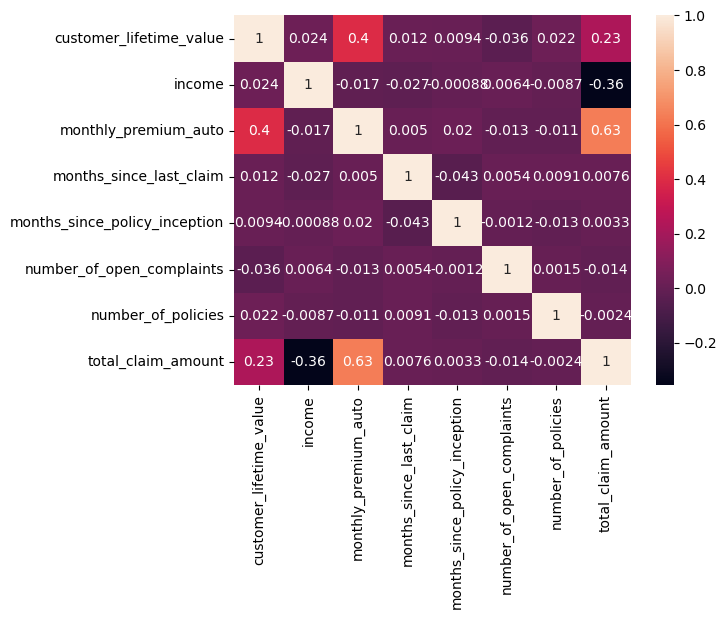

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations_matrix = customer_df_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### Monthly premium auto and total claim amount has the highest correlation with 0.63. It's make sense because the money that the customer is able to claim in total has a high dependency to the amount of money which the customer paying every month as a premium.

### 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function **must have an optional argument set by default to 36** to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df. 

In [16]:
df = customer_df_num
def continuous_discrete_col(df:pd.DataFrame, threshold:int):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    for col in df.columns:
       
        n = df[col].nunique()
        if n <= threshold:
            discrete_df = pd.concat([discrete_df,df[[col]]], axis=1)

        else:
            continuous_df = pd.concat([continuous_df,df[[col]]], axis=1)
    
    return discrete_df, continuous_df

In [17]:
discrete_df, continuous_df = continuous_discrete_col(customer_df_num, 36)
display(discrete_df.head())
display(continuous_df.head())

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


### 11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16). 

#### I think to use a barplot here doesn't make much sense because we use only one value on the y-axis and its very hard to see the max and min values. Better would be a boxplot i think.

In [18]:
def barplot_for_every_column(df:pd.DataFrame):
    rows = df.shape[1]
    n = 0
    fig, ax = plt.subplots(rows,1, figsize=(16,16))
    for col in df.columns:
        sns.barplot(y=col, data = df, ax = ax[n]);
        n += 1
    
    plt.tight_layout()
    plt.show()

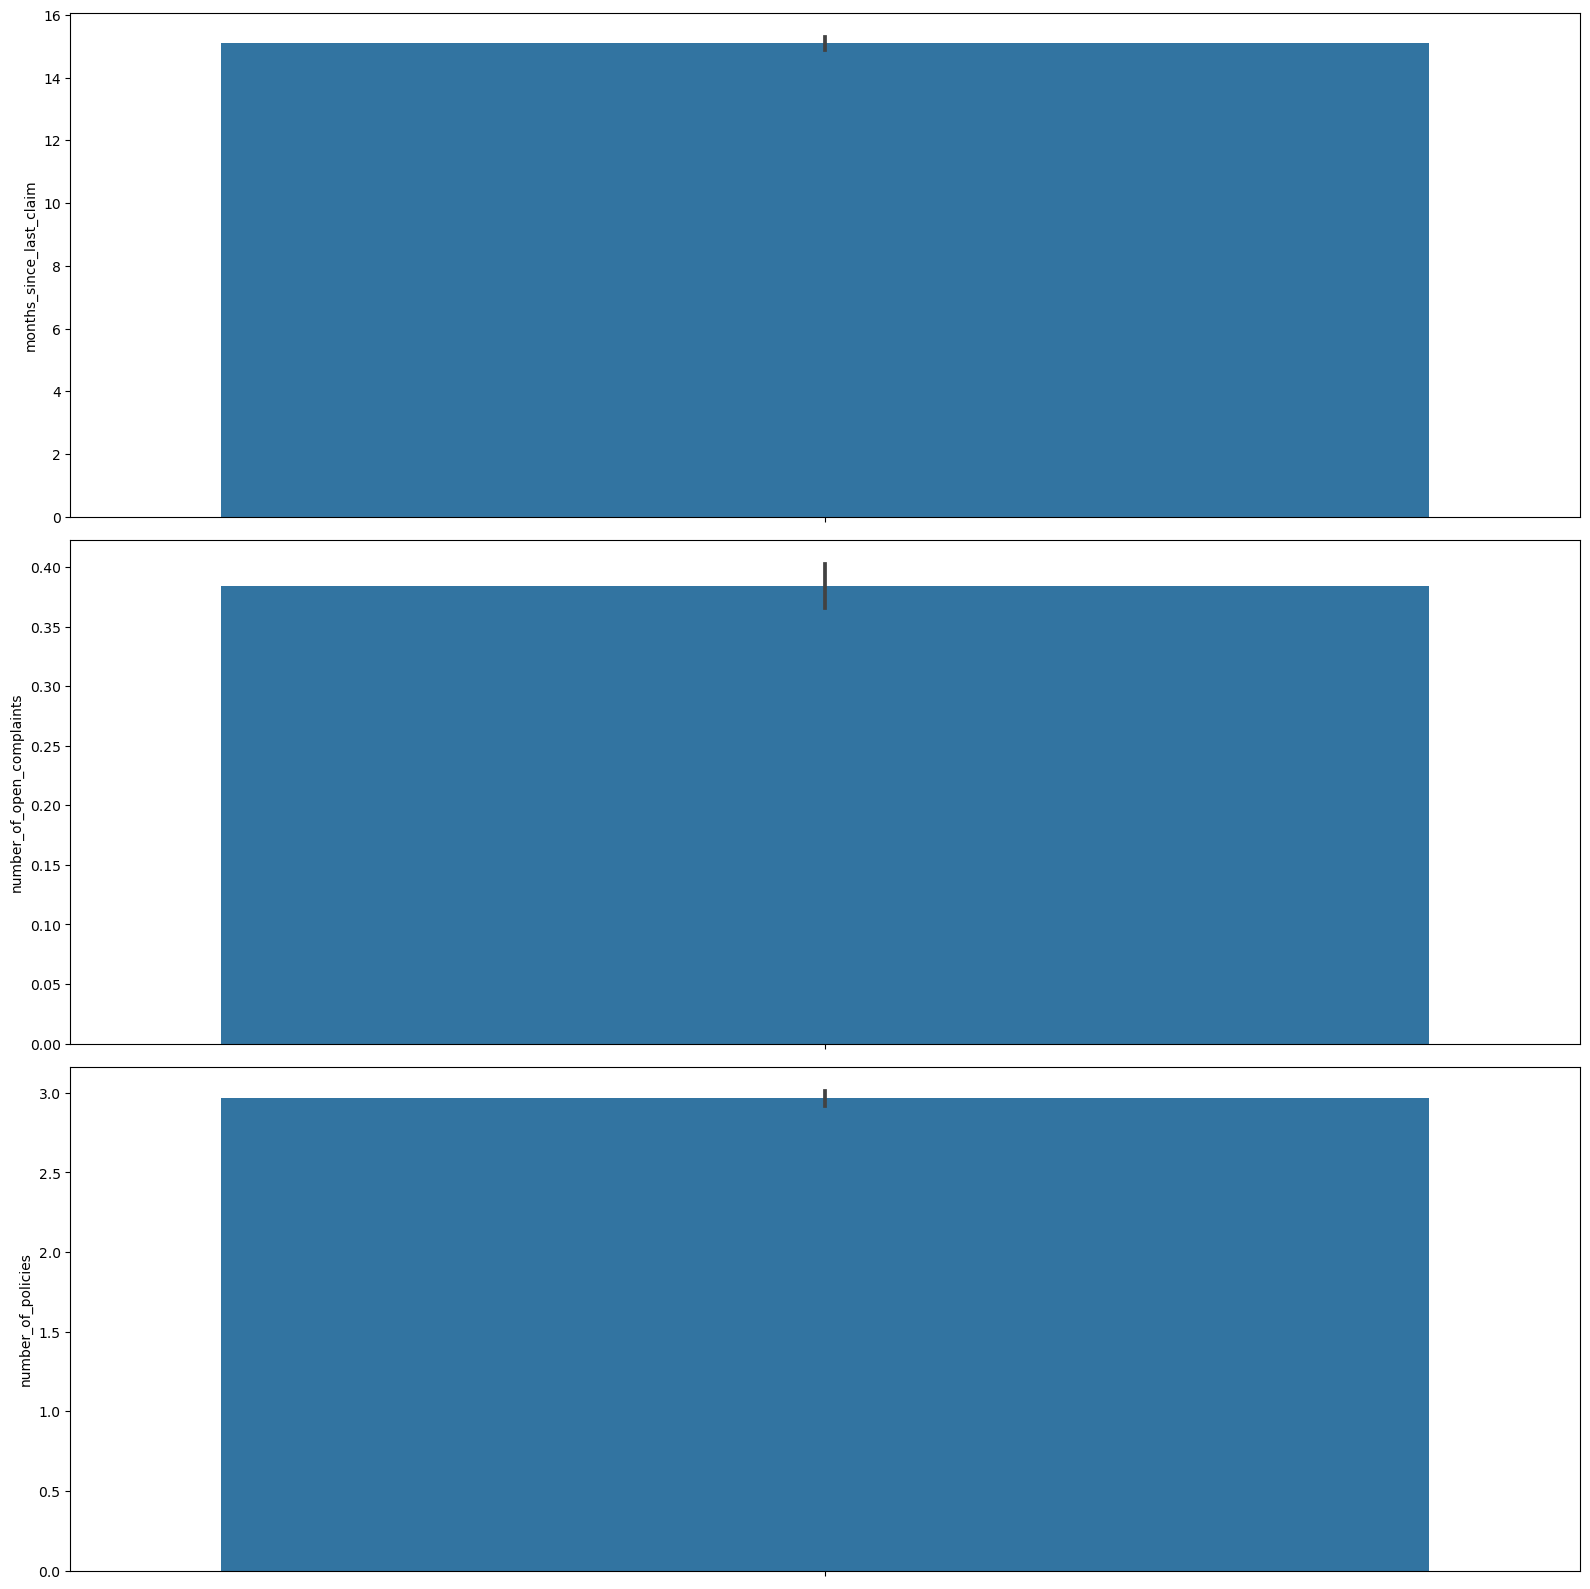

In [19]:
barplot_for_every_column(discrete_df)

### 12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

In [20]:
def histplot_for_every_column(df:pd.DataFrame):
    rows = df.shape[1]
    n = 0
    fig, ax = plt.subplots(rows,1, figsize=(16,16))
    for col in df.columns:
        sns.histplot(x=col, data = df, ax = ax[n]);
        
        n += 1
    plt.tight_layout()
    plt.show()

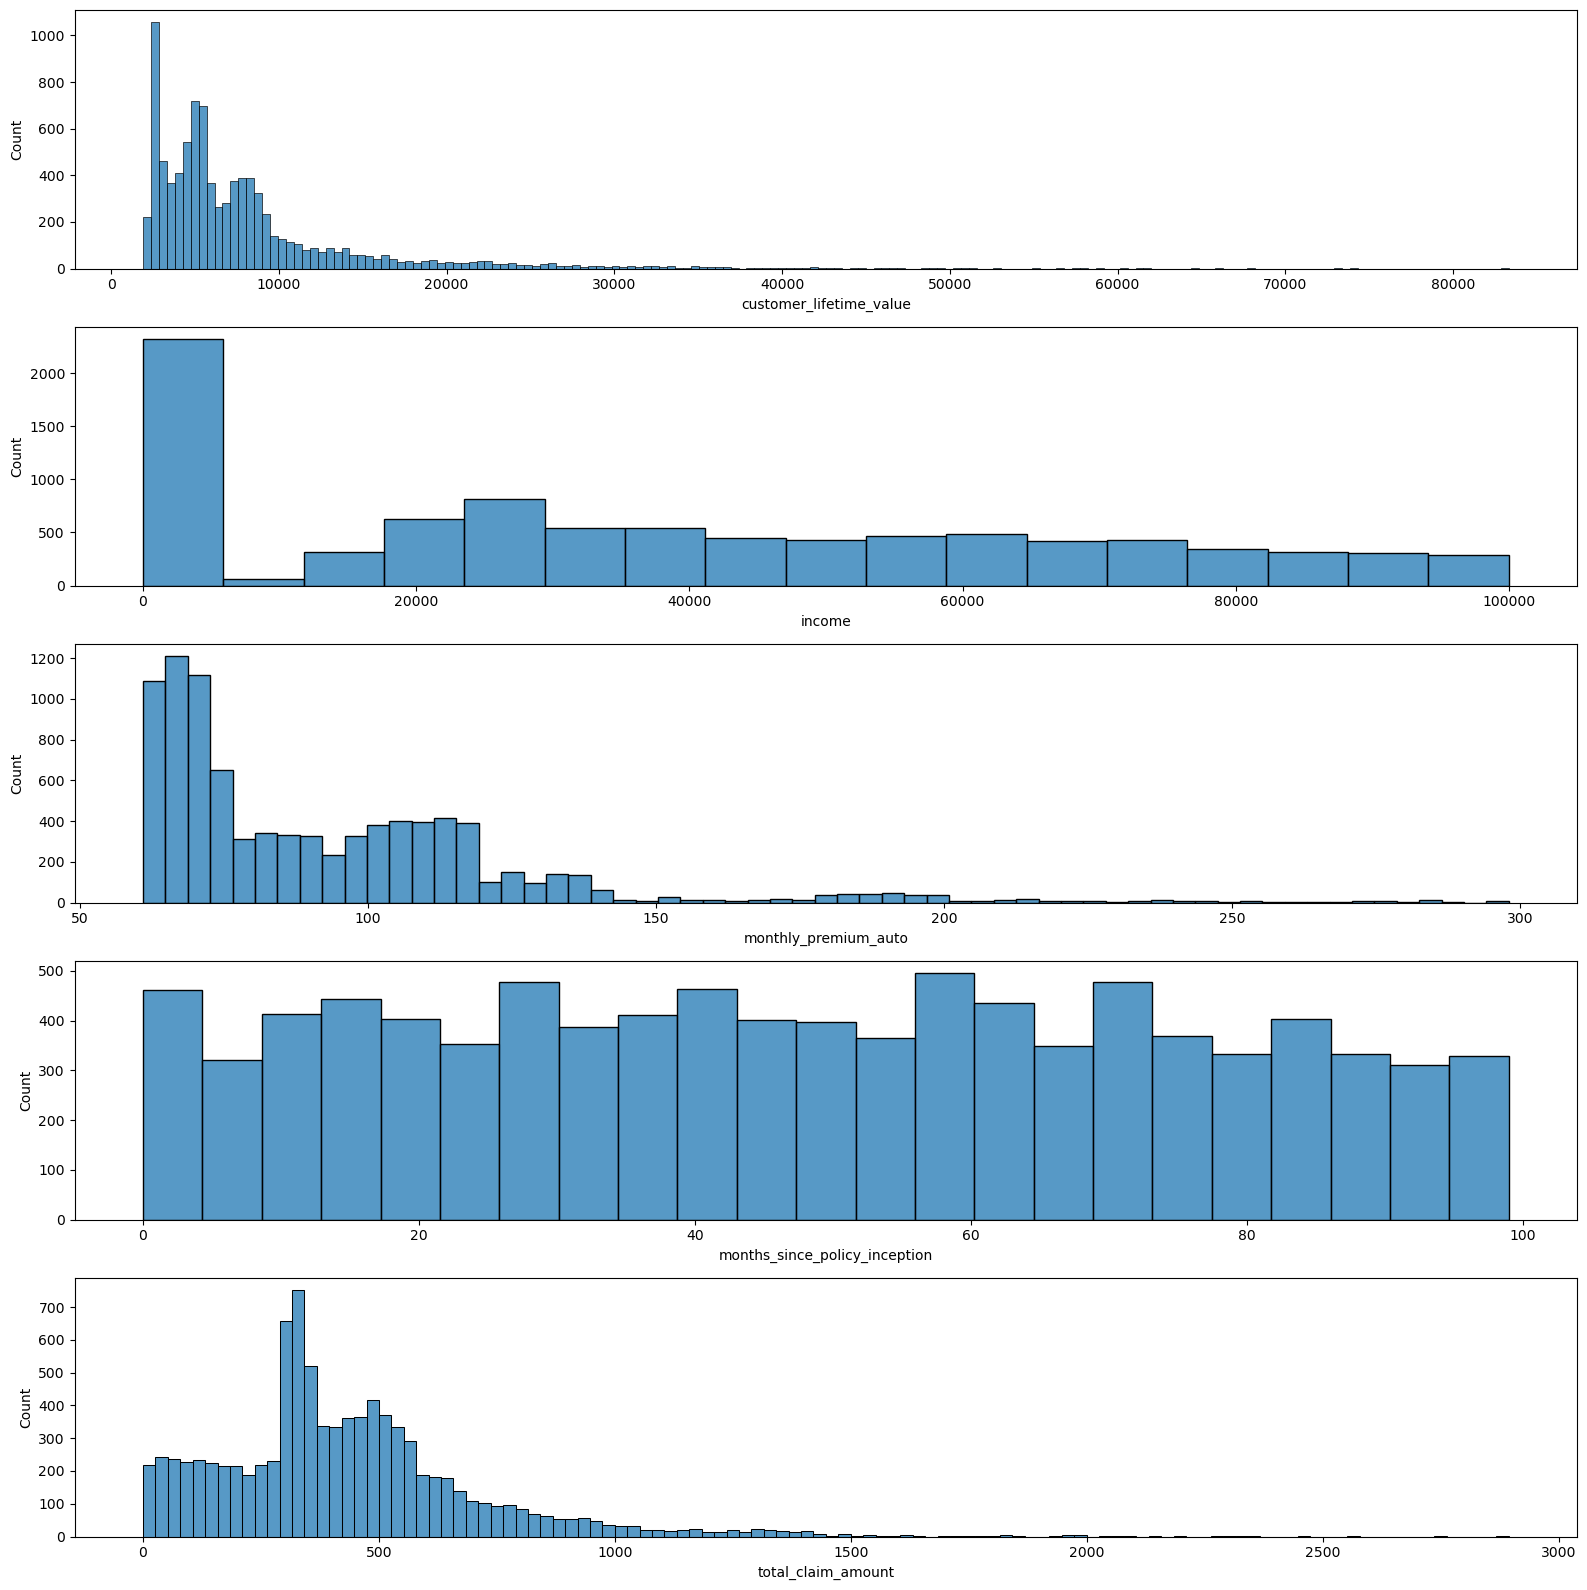

In [21]:
histplot_for_every_column(continuous_df)

### 13. According to the previous histogram plots, do you think that you will have to apply any transformation?

#### I would apply a transformer to every column which is heavly skewed like customer lifetime value, monthly premium auto and total claim amount.

#### The columns income seems to have different ranges. There are a lot of customer with an income of zero. The other customer seems to be quite uniform distributed. One way could be to seperate them into two classes. So to make a prediction for y for the class A (income=0) and class B (income>0).

#### After appling the transform i would scale every column.

### 14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

#### A good way to see outliers would be a boxplot.

In [22]:
def boxplot_for_every_column(df:pd.DataFrame):
    rows = df.shape[1]
    n = 0
    fig, ax = plt.subplots(rows,1, figsize=(16,16))
    for col in df.columns:
        sns.boxplot(x=col, data = df, ax = ax[n]);
        n += 1
    
    plt.tight_layout()
    plt.show()

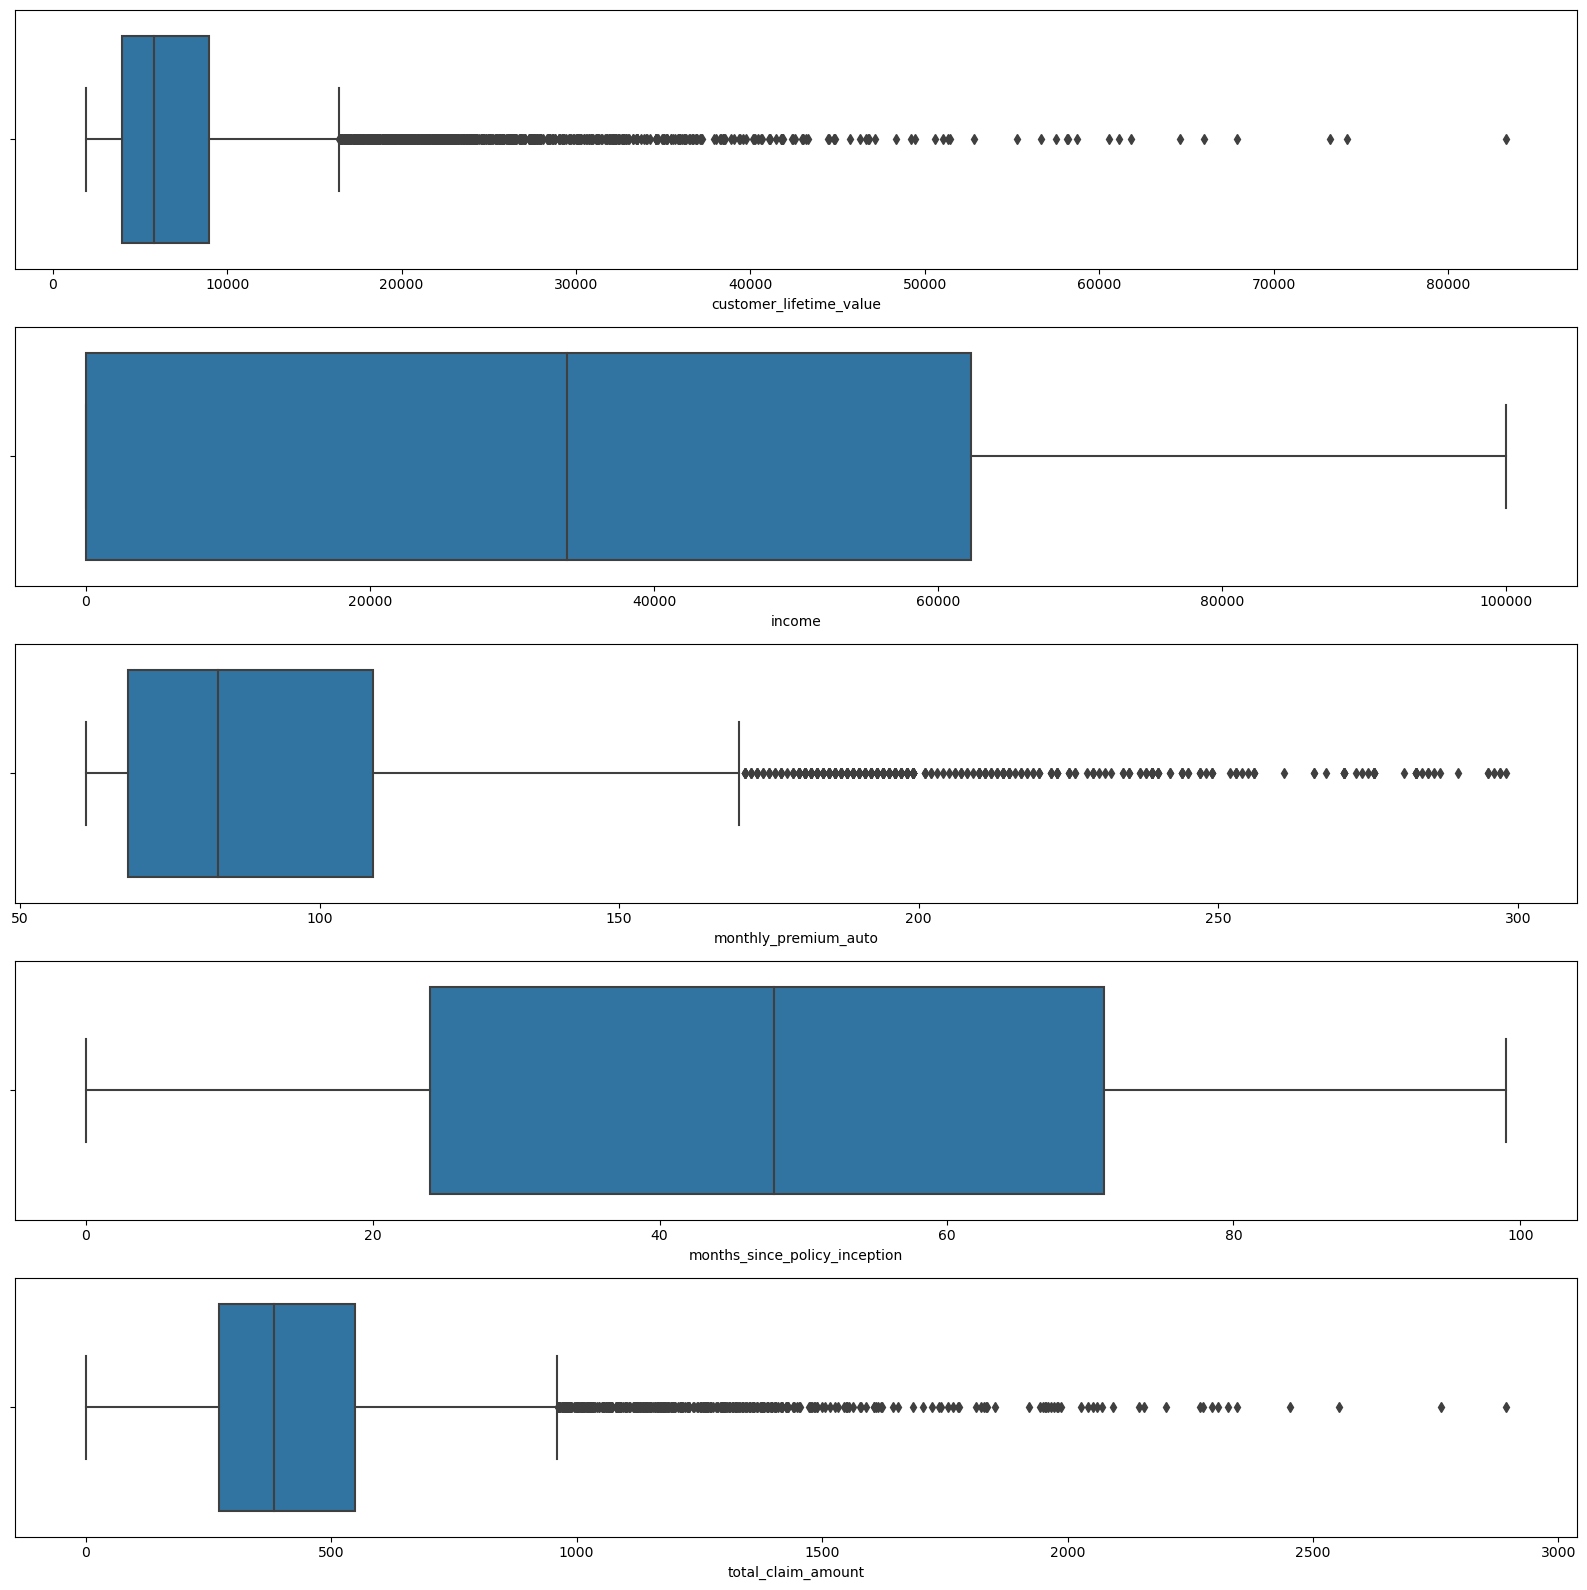

In [23]:
boxplot_for_every_column(continuous_df)